In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop("Id",axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Species']= label.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
from sklearn.model_selection import train_test_split
X=df.drop("Species",axis=1)
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [6]:
model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9333333333333333

In [7]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 17]], dtype=int64)

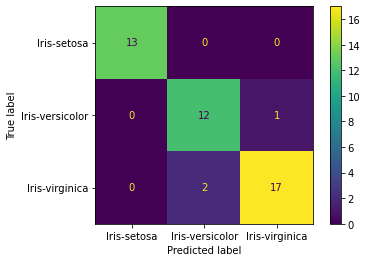

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cmd = ConfusionMatrixDisplay(matrix, display_labels=class_names)
cmd.plot()

In [9]:
# For Setosa
TP=matrix[0][0]
FN=matrix[0][1]+matrix[0][2]
FP=matrix[1][0]+matrix[2][0]
TN=matrix[1][1]+matrix[1][2]+matrix[2][1]+matrix[2][2]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  1.0
Error_rate:  0.0
Precision:  1.0
Recall:  1.0


In [10]:
# For Versicolor
TP=matrix[1][1]
FN=matrix[1][0]+matrix[1][2]
FP=matrix[0][1]+matrix[2][1]
TN=matrix[0][0]+matrix[0][2]+matrix[2][2]+matrix[2][0]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9333333333333333
Error_rate:  0.06666666666666667
Precision:  0.8571428571428571
Recall:  0.9230769230769231


In [11]:
# For Versicolor
TP=matrix[2][2]
FN=matrix[2][0]+matrix[2][1]
FP=matrix[0][2]+matrix[1][2]
TN=matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)  
print("Recall: ",recall)

Accuracy:  0.9333333333333333
Error_rate:  0.06666666666666667
Precision:  0.9444444444444444
Recall:  0.8947368421052632


In [ ]:
def evaluate_metrics_for_class(cm, class_no):
    row_sums, col_sums = np.sum(cm, axis=1), np.sum(cm, axis=0)
    TP, FP, FN = cm[class_no][class_no], row_sums[class_no] - cm[class_no][class_no], col_sums[class_no] - cm[class_no][class_no]
    TN = np.sum(cm) - TP - FP - FN
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return TP, FP, FN, TN, precision, recall